In [1]:
import os
import sys
from phenox.phenox import PhenoX

email = "test@test.xyz"
query_str = "Psoriasis"

phenox = PhenoX(email, query_str)

In [2]:
# Get closest MeSH term and its children
mesh_term, mesh_children = phenox._get_best_mesh_term()

print('Closest MeSH term:')
print(mesh_term['ids'])
print(mesh_term['name'])

print()
print('Children: %s' % '; '.join(mesh_children))

Closest MeSH term:
['C17.800.859.675']
Psoriasis

Children: Arthritis, Psoriatic


In [3]:
# Get GEO datasets
pubmed_clusters = phenox._get_geo_datasets(mesh_term['name'])

print('*Clusters*')
for i, cluster in enumerate(pubmed_clusters):
    print()
    print('%i: %s' % (i + 1, ', '.join(cluster)))

Retrieving matching GEO datasets...


100%|██████████| 1753/1753 [00:00<00:00, 132032.30it/s]


*Clusters*

1: 23771123, 24391825, 15992546, 22752307, 18648529, 21483750, 23685457, 23407402, 27667537, 17003495, 22677045, 11121445, 22908096, 20829794, 17075716, 17928125, 24646743, 22348003, 17277128, 23633458

2: 17932945, 16858420, 17020965, 20200541, 17611229, 19036130, 16618722, 19052557, 16885358, 22479649, 19718476, 21388663, 17947518, 21903671, 23077588, 20688981, 18716044, 16505361, 22277938, 18025162, 25129481


Retrieving matching PubMed abstracts...


100%|██████████| 21/21 [00:10<00:00,  1.93it/s]


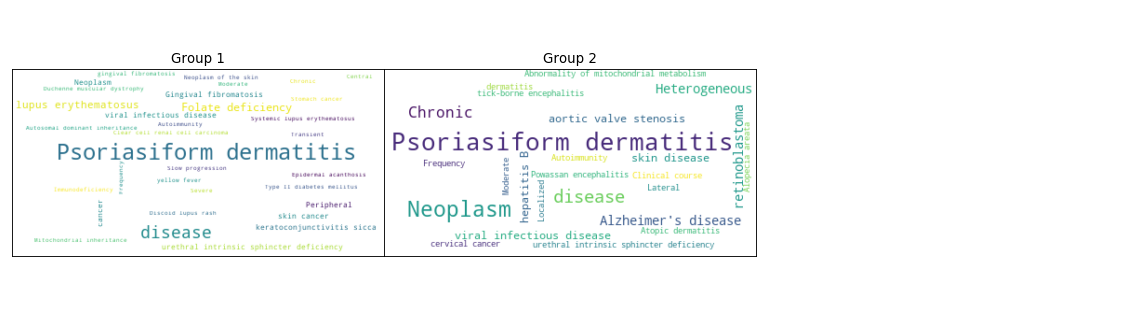

Wordcloud saved to /Users/lwang/git/phenotypeXpression/output/wordcloud.png


In [4]:
# Fetch and annotate PubMed abstracts, generate word clouds
term_frequency = phenox._fetch_pubmed_abstracts(pubmed_clusters)
phenox._visualize(term_frequency)